# Importing Libraries

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import PIL
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader

import torchvision.transforms as transforms
import torchvision.transforms.functional as TF

import torch.optim as optim

import os

from PIL import Image, ImageOps

import random

#import any other library you need below this line

#Loading data

Upload the data in zip format to Colab. Then run the cell below.

In [ ]:
!unzip data.zip

#Defining the Dataset Class

In [63]:

from collections import Counter
class Cell_data(Dataset):
    def __init__(self, data_dir, size, train = 'True', train_test_split = 0.8, augment_data = True):
        ##########################inputs##################################
        #data_dir(string) - directory of the data#########################
        #size(int) - size of the images you want to use###################
        #train(boolean) - train data or test data#########################
        #train_test_split(float) - the portion of the data for training###
        #augment_data(boolean) - use data augmentation or not#############
        super(Cell_data, self).__init__()
        # todo
        self.image_dir = data_dir + '/scans'
        self.mask_dir = data_dir + '/labels'
        self.image_size = size
        self.train = train
        self.train_test_split = train_test_split
        self.augment_data = augment_data
        self.images = os.listdir(self.image_dir)
        self.masks = os.listdir(self.mask_dir)
        #initialize the data class


    def __getitem__(self, idx):
    # todo
    #load image and mask from index idx of your data
    #split the image and mask
        seed = np.random.randint
        image_train_number = int(len(self.images)*self.train_test_split)
        image_train = self.images[0:image_train_number]
        image_test = self.images[image_train_number:len(self.images)]
        mask_train = self.masks[0:image_train_number]
        mask_test = self.masks[image_train_number:len(self.images)]
        if self.train == True:
            img_path = os.path.join(self.image_dir,image_train[idx])
            mask_path = os.path.join(self.mask_dir,mask_train[idx])
        else:
            img_path = os.path.join(self.image_dir,image_test[idx])
            mask_path = os.path.join(self.mask_dir,mask_test[idx])
        img_path = os.path.join(self.image_dir,self.images[idx])
        mask_path = os.path.join(self.mask_dir,self.masks[idx])
        image = Image.open(img_path)
        
        mask = Image.open(mask_path)
        temp_image = image
        temp_mask = mask
        image = transforms.functional.resize(image, [572,572], interpolation=2)
        mask = transforms.functional.resize(mask, [572,572], interpolation=2)

        image = np.array(image,dtype=np.float32)
        mask = np.array(mask)
        normalized_img = image/image.max()

        normalized_img = torch.from_numpy(normalized_img)
        mask = torch.from_numpy(mask)



    #data augmentation part
        if self.augment_data:
            augment_mode = np.random.randint(0, 3)
        if augment_mode == 0:

            Vertical = transforms.RandomVerticalFlip(1)
            normalized_img = Vertical(normalized_img)
            mask = Vertical(mask)
          #flip image vertically
        elif augment_mode == 1:
           #todo
            Horizontal = transforms.RandomHorizontalFlip(1)
            normalized_img = Horizontal(normalized_img)
            mask = Horizontal(mask)
           #flip image horizontally
        elif augment_mode == 2:
           #todo
            normalized_img = normalized_img.numpy()
            normalized_img = PIL.Image.fromarray(normalized_img)
            mask = mask.numpy()
            mask = PIL.Image.fromarray(mask)        
            normalized_img = transforms.functional.resize(normalized_img, [1000,1000], interpolation=2)
            mask = transforms.functional.resize(mask, [1000,1000], interpolation=2)
            normalized_img = transforms.CenterCrop(572)(normalized_img)
            mask = transforms.CenterCrop(572)(mask)
            normalized_img = np.array(normalized_img,dtype = np.float32)
            normalized_img = torch.from_numpy(normalized_img)
            mask = np.array(mask,dtype = np.float32)
            mask = torch.from_numpy(mask)
           #zoom image
        else:
          #todo
          #rotate image
            normalized_img = normalized_img.numpy()
            mask = mask.numpy()
            normalized_img = normalized_img.transpose()
            mask = mask.transpose()
            normalized_img = torch.from_numpy(normalized_img)
            mask = torch.from_numpy(mask)
            Horizontal = transforms.RandomHorizontalFlip(1)
            normalized_img = Horizontal(normalized_img)
            mask = Horizontal(mask)
#         todo
#         return image and mask in tensors
#         print(normalized_img.size())
        return normalized_img, mask



    def __len__(self):
        image_train_number = int(len(self.images)*self.train_test_split)
        if self.train == True:
            return len(self.images[0:image_train_number])
        else:
            return len(self.images[image_train_number:len(self.images)])
# data_dir = os.path.join(root_dir, 'data\cells')
# print(data_dir)
# testset = Cell_data(data_dir = data_dir, size = image_size, train = False)
# i = random.randint(0,20)
# testloader = DataLoader(testset, batch_size = i)
# image, labels = testset.__getitem__(1)
# fig, axes = plt.subplots(testset.__len__(), 2, figsize = (20, 20))
# for i in range(1):
#     axes[i, 0].imshow(image)
#     axes[i, 0].axis('off')
#     axes[i, 1].imshow(labels)
#     axes[i, 1].axis('off')
# # model.eval()
# print(testset.__len__())

# output_masks = []
# output_labels = []
# images = []
# with torch.no_grad():
#     for i in range(testset.__len__()):
#         image, labels = testset.__getitem__(i)

#         input_image = image.unsqueeze(0).unsqueeze(0).to(device)
#         pred = model(input_image)

#         output_mask = torch.max(pred, dim = 1)[1].cpu().squeeze(0).numpy()

#         crop_x = (labels.shape[0] - output_mask.shape[0]) // 2
#         crop_y = (labels.shape[1] - output_mask.shape[1]) // 2
#         labels = labels[crop_x: labels.shape[0] - crop_x, crop_y: labels.shape[1] - crop_y].numpy()

#         output_masks.append(output_mask)
#         output_labels.append(labels)
#         images.append(image)

# for i in range(testset.__len__()):
#     axes[i, 0].imshow(output_labels[i])
#     axes[i, 0].axis('off')
#     axes[i, 1].imshow(images[i])
#     axes[i, 1].axis('off')

#Define the Model
1. Define the Convolution blocks
2. Define the down path
3. Define the up path
4. combine the down and up path to get the final model

In [57]:
class twoConvBlock(nn.Module):
    def __init__(self, inplane, outplane):
        super(twoConvBlock, self).__init__()
        self.two_Conv = nn.Sequential(
        nn.Conv2d(inplane,outplane,kernel_size=3, bias=False),
        nn.BatchNorm2d(outplane),
        nn.ReLU(),
        nn.Conv2d(outplane,outplane,kernel_size=3, bias=False),
        nn.BatchNorm2d(outplane),
        nn.ReLU(),
        )
        #todo
        #initialize the block

    def forward(self, x):
    #todo
        return self.two_Conv(x)
    #implement the forward path

class downStep(nn.Module):
    def __init__(self, inplane, outplane):
        super(downStep, self).__init__()
        #todo
        self.down_step = nn.Sequential(
        nn.MaxPool2d(kernel_size=2, stride=2),
        twoConvBlock(inplane,outplane),
        )
        #initialize the down path

    def forward(self, x):
    #todo
        return self.down_step(x)
    #implement the forward path

def crop_img(x1, x2):
    #x1 is the tensor that need to be cropped
    target_size = x2.size()[2]
    # x2 is the target tensor, which has the smaller size
    source_size = x1.size()[2]
    diff = source_size-target_size
    diff = diff // 2
    return x1[:, :, diff:source_size-diff, diff:source_size-diff]
class upStep(nn.Module):
    def __init__(self, inplane,outplane):
        super(upStep, self).__init__()
        #todo
        self.up = nn.ConvTranspose2d(inplane, inplane // 2, kernel_size=2, stride=2)
        self.conv = twoConvBlock(inplane, outplane)
        #initialize the up path


    def forward(self,x1,x2):
        #todo
        x2 = self.up(x2)
        x = crop_img(x1,x2)
        x_temp = torch.cat([x2, x], dim=1)
        return self.conv(x_temp)
        #implement the forward path

class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        #todo
        self.twoConv = twoConvBlock(1,64)
        self.down1 = downStep(64,128)
        self.down2 = downStep(128,256)
        self.down3 = downStep(256,512)
        self.down4 = downStep(512,1024)
        self.up1 = upStep(1024,512)
        self.up2 = upStep(512,256)
        self.up3 = upStep(256,128)
        self.up4 = upStep(128,64)
        self.final_conv = nn.Conv2d(64,2,kernel_size=1,bias=False)
        
        #initialize the complete model

    def forward(self, x):
    #todo
    #implement the forward path
     
        x1 = self.twoConv(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x6 = self.up1(x4,x5)
        x7 = self.up2(x3,x6)
        x8 = self.up3(x2,x7)
        x9 = self.up4(x1,x8)
        x_final = self.final_conv(x9)
        return x_final

        

if __name__ == "__main__":
    image = torch.rand((1,1,572,572))
    model = UNet()



#Training

In [64]:
#Paramteres

#learning rate

lr = 1e-2
augment_data = True
#number of training epochs
epoch_n = 50

#input image-mask size
image_size = 572
#root directory of project
root_dir = os.getcwd()

#training batch size
batch_size = 1

#use checkpoint model for training
load = False

#use GPU for training
gpu = True

data_dir = os.path.join(root_dir, 'data\cells')


trainset = Cell_data(data_dir = data_dir, size = image_size,)
trainloader = DataLoader(trainset, batch_size = 1, shuffle=True)

testset = Cell_data(data_dir = data_dir, size = image_size, train = False)
testloader = DataLoader(testset, batch_size = 1)

device = 'cuda:0'

model = UNet().to(device)

if load:
    print('loading model')
    model.load_state_dict(torch.load('checkpoint.pt'))

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=lr,weight_decay=0.0005)

model.train()
train_loss = []
test_loss = []
accurancy = []
for e in range(epoch_n):
    epoch_loss = 0
    model.train()
    for i, data in enumerate(trainloader):
        image, label = data

        image = image.unsqueeze(1).to(device)
        label = label.long().to(device)

        pred = model(image)

        crop_x = (label.shape[1] - pred.shape[2]) // 2
        crop_y = (label.shape[2] - pred.shape[3]) // 2

        label = label[:, crop_x: label.shape[1] - crop_x, crop_y: label.shape[2] - crop_y]

        loss = criterion(pred, label)

        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        epoch_loss += loss.item()

        print('batch %d --- Loss: %.4f' % (i, loss.item() / batch_size))
    train_loss.append(epoch_loss / trainset.__len__())
    print('Epoch %d / %d --- Loss: %.4f' % (e + 1, epoch_n, epoch_loss / trainset.__len__()))

#     torch.save(model.state_dict(), 'checkpoint.pt')

    model.eval()

    total = 0
    correct = 0
    total_loss = 0

    with torch.no_grad():
        for i, data in enumerate(testloader):
            image, label = data

            image = image.unsqueeze(1).to(device)
            label = label.long().to(device)

            pred = model(image)
            crop_x = (label.shape[1] - pred.shape[2]) // 2
            crop_y = (label.shape[2] - pred.shape[3]) // 2

            label = label[:, crop_x: label.shape[1] - crop_x, crop_y: label.shape[2] - crop_y]

            loss = criterion(pred, label)
            total_loss += loss.item()

            _, pred_labels = torch.max(pred, dim = 1)

            total += label.shape[0] * label.shape[1] * label.shape[2]
            correct += (pred_labels == label).sum().item()
        test_loss.append(total_loss / testset.__len__())
        accurancy.append(correct / total)
        print('Accuracy: %.4f ---- Loss: %.4f' % (correct / total, total_loss / testset.__len__()))


    



batch 0 --- Loss: 0.7325
batch 1 --- Loss: 0.5865
batch 2 --- Loss: 1.4154
batch 3 --- Loss: 0.6976
batch 4 --- Loss: 0.6353
batch 5 --- Loss: 0.9143
batch 6 --- Loss: 0.4204
batch 7 --- Loss: 0.6719
Epoch 1 / 50 --- Loss: 0.7592
Accuracy: 0.5000 ---- Loss: 579.5914
batch 0 --- Loss: 0.3876
batch 1 --- Loss: 1.3185
batch 2 --- Loss: 0.5887
batch 3 --- Loss: 0.6715
batch 4 --- Loss: 0.5258
batch 5 --- Loss: 0.4650
batch 6 --- Loss: 0.4680
batch 7 --- Loss: 0.6584
Epoch 2 / 50 --- Loss: 0.6355
Accuracy: 0.7537 ---- Loss: 0.5596
batch 0 --- Loss: 0.4858
batch 1 --- Loss: 0.5464
batch 2 --- Loss: 0.5796
batch 3 --- Loss: 0.4787
batch 4 --- Loss: 0.6255
batch 5 --- Loss: 0.5868
batch 6 --- Loss: 0.9101
batch 7 --- Loss: 0.7024
Epoch 3 / 50 --- Loss: 0.6144
Accuracy: 0.8371 ---- Loss: 0.4881
batch 0 --- Loss: 0.6296
batch 1 --- Loss: 0.4915
batch 2 --- Loss: 0.5532
batch 3 --- Loss: 0.7305
batch 4 --- Loss: 0.4685
batch 5 --- Loss: 0.8329
batch 6 --- Loss: 0.4709
batch 7 --- Loss: 0.4660
Epo

Accuracy: 0.7391 ---- Loss: 0.6918
batch 0 --- Loss: 0.7329
batch 1 --- Loss: 0.4936
batch 2 --- Loss: 0.4627
batch 3 --- Loss: 0.5005
batch 4 --- Loss: 0.5367
batch 5 --- Loss: 0.4883
batch 6 --- Loss: 0.4901
batch 7 --- Loss: 0.5308
Epoch 32 / 50 --- Loss: 0.5294
Accuracy: 0.6328 ---- Loss: 0.5883
batch 0 --- Loss: 0.5173
batch 1 --- Loss: 0.4795
batch 2 --- Loss: 0.4415
batch 3 --- Loss: 0.4429
batch 4 --- Loss: 0.5836
batch 5 --- Loss: 0.6659
batch 6 --- Loss: 0.4045
batch 7 --- Loss: 0.3959
Epoch 33 / 50 --- Loss: 0.4914
Accuracy: 0.6778 ---- Loss: 0.8277
batch 0 --- Loss: 0.5741
batch 1 --- Loss: 0.6107
batch 2 --- Loss: 0.6871
batch 3 --- Loss: 0.5478
batch 4 --- Loss: 0.7157
batch 5 --- Loss: 0.7571
batch 6 --- Loss: 0.5096
batch 7 --- Loss: 0.3801
Epoch 34 / 50 --- Loss: 0.5978
Accuracy: 0.6897 ---- Loss: 0.6402
batch 0 --- Loss: 0.4141
batch 1 --- Loss: 0.4343
batch 2 --- Loss: 0.5053
batch 3 --- Loss: 0.3941
batch 4 --- Loss: 0.3208
batch 5 --- Loss: 0.6323
batch 6 --- Loss:

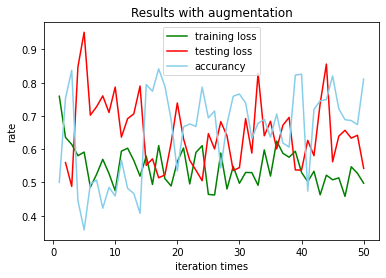

In [65]:

x_axix = range(1,51)
plt.title('Results with augmentation')
plt.plot(x_axix[0:50], train_loss[0:50], color='green', label='training loss')
plt.plot(x_axix[1:50], test_loss[1:50], color='red', label='testing loss')
plt.plot(x_axix[0:50], accurancy[0:50],  color='skyblue', label='accurancy')
plt.legend() # 

plt.xlabel('iteration times')
plt.ylabel('rate')
plt.savefig('./result2.png')
plt.show()


#Testing and Visualization

In [54]:
model.eval()


output_masks = []
output_labels = []

with torch.no_grad():
    for i in range(testset.__len__()):
        image, labels = testset.__getitem__(i)

        input_image = image.unsqueeze(0).unsqueeze(0).to(device)
        pred = model(input_image)

        output_mask = torch.max(pred, dim = 1)[1].cpu().squeeze(0).numpy()

        crop_x = (labels.shape[0] - output_mask.shape[0]) // 2
        crop_y = (labels.shape[1] - output_mask.shape[1]) // 2
        labels = labels[crop_x: labels.shape[0] - crop_x, crop_y: labels.shape[1] - crop_y].numpy()

        output_masks.append(output_mask)
        output_labels.append(labels)


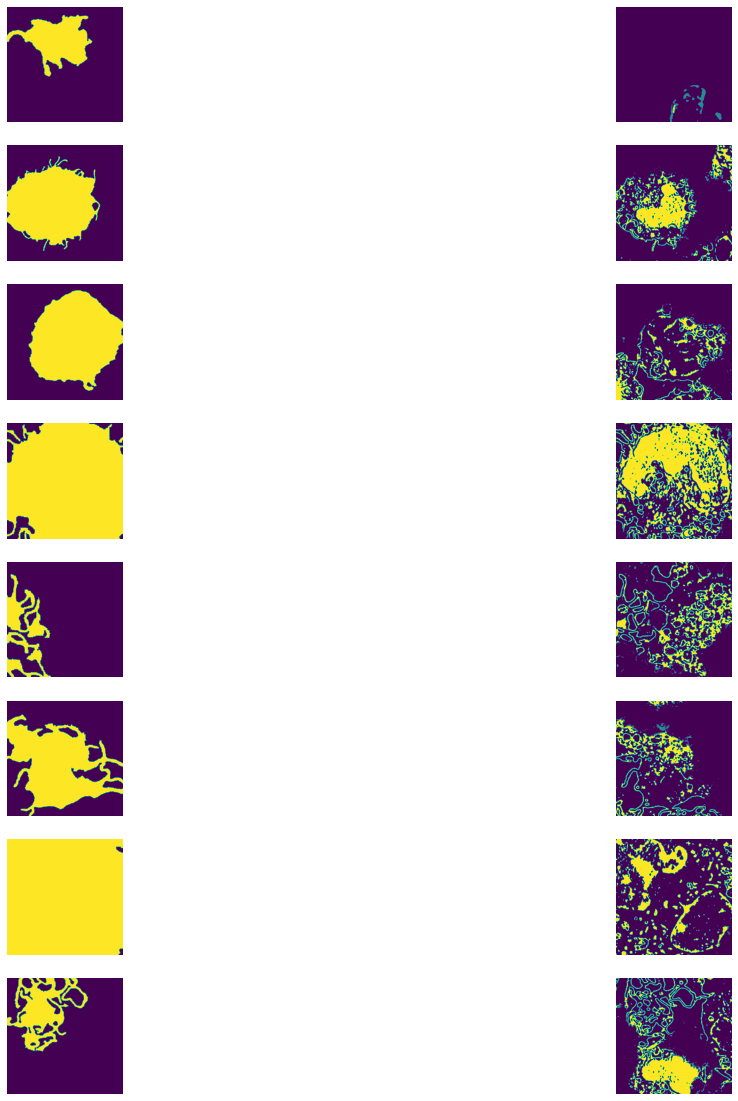

In [55]:
fig, axes = plt.subplots(testset.__len__(), 2, figsize = (20, 20))

for i in range(testset.__len__()):
    axes[i, 0].imshow(output_labels[i])
    axes[i, 0].axis('off')
    axes[i, 1].imshow(output_masks[i])
    axes[i, 1].axis('off')

In [44]:
print(len(output_labels[1]))

388
